Investigating Granger Causality between US Chicken Population and Egg Production from 1930 to 1983

Important Note: The dataset used below is exported from RStudios' 'lmtest' package as ChickEgg.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

In [2]:
# We load our dataset.

In [6]:
ChickEgg = pd.read_csv('/Users/EKIM/Desktop/ChickEgg.csv')

In [8]:
ChickEgg.head(10) # Important note: Egg population is measured in millions of dozens

,year,chicken,egg
0,1930,468491,3581
1,1931,449743,3532
2,1932,436815,3327
3,1933,444523,3255
4,1934,433937,3156
5,1935,389958,3081
6,1936,403446,3166
7,1937,423921,3443
8,1938,389624,3424
9,1939,418591,3561


In [9]:
# Lets visualize the data

In [11]:
x = ChickEgg.year
y1 = ChickEgg['chicken']
y2 = ChickEgg['egg']

In [47]:
# We are going to create a plot with 2 Y-Axis that will indicate chicken population and egg production against
# the X-axis year.

<function matplotlib.pyplot.show(close=None, block=None)>

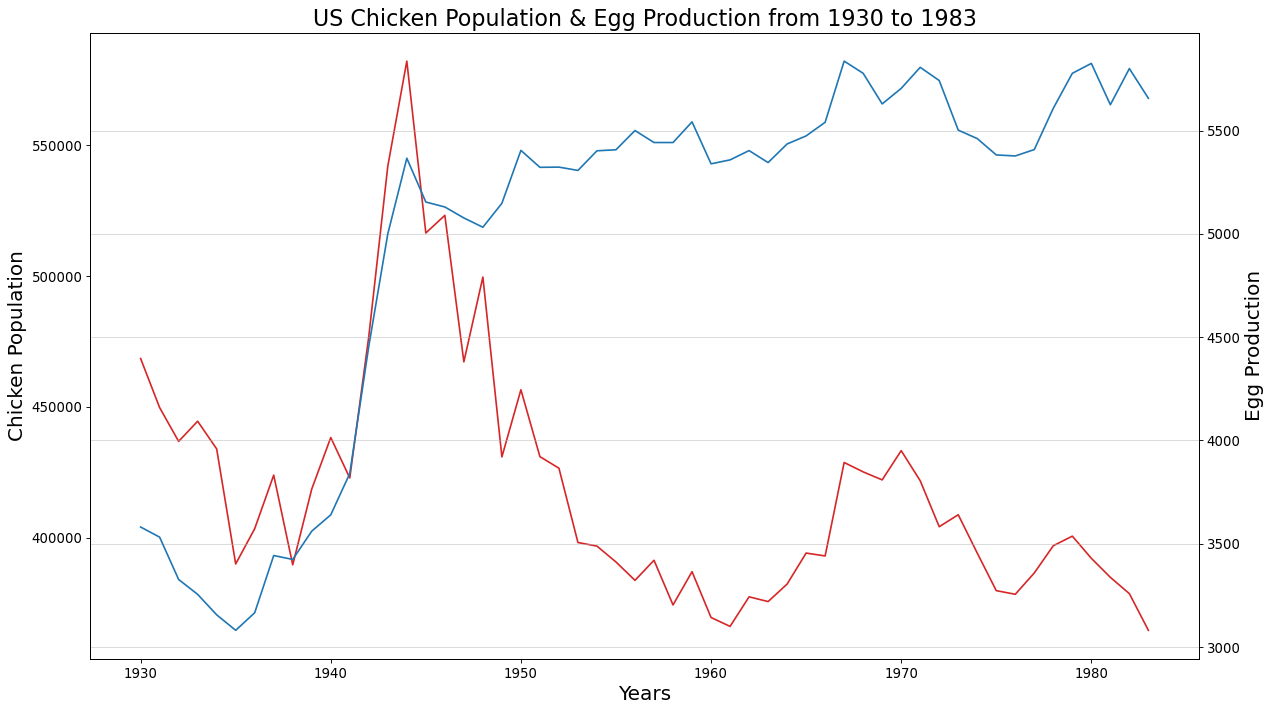

In [45]:
# First we plot Chicken Population on the left Y-Axis
fig, axis1 = plt.subplots(1,1,figsize = (16,9), dpi = 80)
axis1.plot(x, y1, color = 'tab:red')

# We now plot the 2nd Y axis, egg production
axis2 = axis1.twinx() # twinx() allows us to create another axes that shares the same X axis
axis2.plot(x, y2, color = 'tab:blue')

# Customising Labels and Adding Titles

axis1.set_xlabel('Years', color = 'k', fontsize = 18)
axis1.tick_params(axis ='x', labelsize = 12)

axis1.set_ylabel('Chicken Population', color = 'k', fontsize = 18)
axis1.tick_params(axis = 'y',labelsize = 12)

axis2.set_ylabel('Egg Production',color = 'k', fontsize = 18)
axis2.tick_params(axis = 'y', labelsize = 12)

axis2.set_title('US Chicken Population & Egg Production from 1930 to 1983', fontsize = 20)
axis2.grid(alpha = .5)

fig.tight_layout()
plt.show




In [46]:
# The figure can only tell us so much, lets perform the Granger Causality Test.

In [ ]:
# We use the grangercausalitytests() function for this, the notation is as follows
# grangercausalitytests(somedata[['X','Y']], maxlag=[n] ), with this notation, we are testing if lagged values of Y
# Granger Cause X

In [58]:
grangercausalitytests(ChickEgg[['egg','chicken']],maxlag = [1]) # we are checking here if chickens Granger Cause eggs,
# change the lag value and see what happens.


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0470  , p=0.8292  , df_denom=50, df_num=1
ssr based chi2 test:   chi2=0.0499  , p=0.8233  , df=1
likelihood ratio test: chi2=0.0498  , p=0.8234  , df=1
parameter F test:         F=0.0470  , p=0.8292  , df_denom=50, df_num=1


{1: ({'ssr_ftest': (0.04703185649933608, 0.8291934626130192, 50.0, 1),
   'ssr_chi2test': (0.04985376788929625, 0.8233179240738427, 1),
   'lrtest': (0.04983033542987414, 0.8233587660665145, 1),
   'params_ftest': (0.04703185649933298, 0.8291934626130291, 50.0, 1.0)},
   array([[0., 1., 0.]])])}

In [ ]:
# Up to lag 5 we find that the p-value is not less than our chosen value of significance that is 0.05. 
# This means that we cannot reject the null, therefore the number of chickens is not useful in predicting number of eggs

In [ ]:
# Lets run it in reverse now, and check if eggs Granger Cause chickens

In [64]:
grangercausalitytests(ChickEgg[['chicken','egg']],maxlag = [2])


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.8175  , p=0.0006  , df_denom=47, df_num=2
ssr based chi2 test:   chi2=19.5110 , p=0.0001  , df=2
likelihood ratio test: chi2=16.5676 , p=0.0003  , df=2
parameter F test:         F=8.8175  , p=0.0006  , df_denom=47, df_num=2


{2: ({'ssr_ftest': (8.817472803317807, 0.0005601651050435339, 47.0, 2),
   'ssr_chi2test': (19.511003649894725, 5.797481737180912e-05, 2),
   'lrtest': (16.567596056902858, 0.0002525760848622297, 2),
   'params_ftest': (8.817472803316488, 0.0005601651050440705, 47.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [65]:
# We now see that starting from lag 2 that the p-value is less than 0.05. So we can reject the Null Hypothesis 
# And state with 95% confidence that, the egg came first :)

In [ ]:
# -----------------------------------------

In [ ]:
# Let us plot the lagged value of eggs against chickens.

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 3)'>

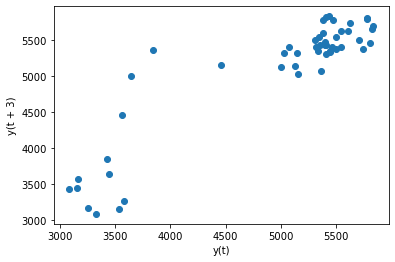

In [66]:
pd.plotting.lag_plot(y2, lag = 3)

In [67]:
lag_egg = ChickEgg['egg']

In [69]:
lag_egg.head(10)

0    3581
1    3532
2    3327
3    3255
4    3156
5    3081
6    3166
7    3443
8    3424
9    3561
Name: egg, dtype: int64

In [ ]:
# add lag time

In [89]:
x3 = x[3:]

In [87]:
lag_time.head()

3    1933
4    1934
5    1935
6    1936
7    1937
Name: year, dtype: int64

In [76]:
y3 = lag_egg[3:]

In [71]:
lag_egg_1.head(5)

3    3255
4    3156
5    3081
6    3166
7    3443
Name: egg, dtype: int64

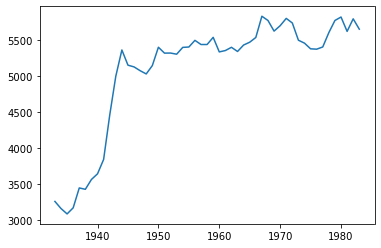

In [97]:
plt.plot(x3,y3)

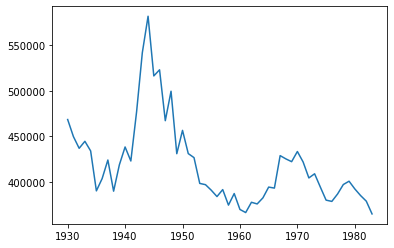

In [98]:
plt.plot(x,y1)